In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from os.path import join as opj
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
import plotly.offline as py
import plotly.graph_objs as go
from matplotlib import pyplot
plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

In [94]:
train = pd.read_json("./Data/train.json")
test = pd.read_json("./Data/test.json")

In [95]:
train.head()

,band_1,band_2,id,inc_angle,is_iceberg
0,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",dfd5f913,43.9239,0
1,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",e25388fd,38.1562,0
2,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",58b2aaa0,45.2859,1
3,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",4cfc3a18,43.8306,0
4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",271f93f4,35.6256,0


In [92]:
train.tail()

,band_1,band_2,id,inc_angle,is_iceberg
1599,"[-30.999878, -29.976866, -28.233906, -29.50732...","[-27.847719, -28.233864, -24.712077999999998, ...",04e11240,na,0
1600,"[-25.31155, -26.511555, -28.694487, -27.180115...","[-29.563713, -28.290375, -26.839405, -28.29046...",c7d6f6f8,na,0
1601,"[-18.141895, -18.141844, -19.01737, -19.701599...","[-25.305355, -29.387701, -28.963863, -26.16023...",bba1a0f1,na,0
1602,"[-22.455633, -25.794661, -26.954567, -22.83354...","[-26.070356, -22.093737, -21.577662, -24.53376...",7f66bb44,na,0
1603,"[-19.909191, -20.678406, -20.208834, -18.42441...","[-24.44487, -24.956001, -27.722103, -26.078417...",9d8f326c,na,0


In [89]:
train['band_1'][1]

[-12.242375,
 -14.920304999999999,
 -14.920363,
 -12.666336,
 -10.387527,
 -11.345262,
 -13.046976,
 -13.720695,
 -12.728892,
 -12.791664,
 -15.589305,
 -15.853929,
 -18.204786,
 -15.503053,
 -13.047442,
 -13.047501,
 -12.243308,
 -12.184479,
 -12.60539,
 -11.727338,
 -9.700563,
 -12.605564,
 -16.035534,
 -13.791961,
 -10.581721,
 -7.666193,
 -8.702394,
 -12.483576,
 -13.934649,
 -13.311546,
 -14.841942,
 -16.90056,
 -18.565422,
 -18.565422,
 -16.800262,
 -13.514631,
 -11.728271,
 -8.624724,
 -7.986655,
 -10.98196,
 -18.56583,
 -20.627296,
 -20.174074,
 -16.036699,
 -13.312364,
 -16.800902999999998,
 -18.566181,
 -15.94598,
 -14.302303,
 -11.085336999999999,
 -10.881012,
 -12.424389,
 -13.93599,
 -12.669195,
 -12.985139,
 -16.222214,
 -15.76741,
 -11.898161,
 -10.108891,
 -12.186872,
 -16.507315,
 -18.567057,
 -16.316525,
 -16.50749,
 -15.251732,
 -14.378501,
 -16.411688,
 -16.802189,
 -16.222975,
 -21.788769,
 -17.640207,
 -12.425558,
 -10.633402,
 -11.956054,
 -14.379026,
 -13.046626

In [96]:
train['band_2'][1]

[-31.506321,
 -27.984554,
 -26.645678,
 -23.767605,
 -22.146997,
 -27.289545,
 -25.761837,
 -25.761894,
 -26.961914,
 -26.646084,
 -25.219025,
 -24.959785,
 -25.762188,
 -25.762245,
 -24.959961,
 -26.646435,
 -25.486656,
 -23.994041,
 -23.994101,
 -26.341869,
 -28.355331,
 -26.646786,
 -24.463955,
 -25.219784,
 -25.762886,
 -23.125195,
 -22.148281,
 -25.487297,
 -25.220078,
 -25.487413,
 -25.763237,
 -22.335375,
 -22.721535,
 -22.721535,
 -25.220367,
 -27.986481,
 -26.048338,
 -26.048397,
 -28.356323,
 -33.312069,
 -29.146612,
 -26.647894,
 -25.763878,
 -27.632372,
 -32.668671,
 -25.488289,
 -22.722294,
 -21.440002,
 -21.44006,
 -25.488522,
 -26.964304,
 -26.343679,
 -26.343737,
 -28.357199,
 -28.357258,
 -27.987648,
 -28.743477,
 -26.049564,
 -23.33637,
 -21.788185,
 -22.337008,
 -24.228189,
 -26.965008,
 -24.46629,
 -24.962822,
 -27.988234,
 -26.649357,
 -26.649414,
 -29.572033,
 -30.487242,
 -27.988525,
 -27.634008,
 -25.765633,
 -24.466875,
 -25.489983,
 -25.485723,
 -24.959202,
 -

In [97]:

#Thank you to MuonNeutrino and DeveshMaheshwari in helping me visualize the information
def getStat(train,label=1):
    train['max'+str(label)] = [np.max(np.array(x))for x in train['band_'+str(label)]]
    train['maxpos'+str(label)] = [np.argmax(np.array(x)) for x in train['band_'+str(label)] ]
    train['min'+str(label)] = [np.min(np.array(x)) for x in train['band_'+str(label)] ]
    train['minpos'+str(label)] = [np.argmin(np.array(x)) for x in train['band_'+str(label)] ]
    train['med'+str(label)] = [np.median(np.array(x)) for x in train['band_'+str(label)] ]
    train['std'+str(label)] = [np.std(np.array(x)) for x in train['band_'+str(label)] ]
    train['mean'+str(label)] = [np.mean(np.array(x)) for x in train['band_'+str(label)] ]
    train['p25_'+str(label)] = [np.sort(np.array(x))[int(0.25*75*75)] for x in train['band_'+str(label)] ]
    train['p75_'+str(label)] = [np.sort(np.array(x))[int(0.75*75*75)] for x in train['band_'+str(label)] ]
    train['mid50_'+str(label)] = train['p75_'+str(label)]-train['p25_'+str(label)]
    return train

train=getStat(train,1)
train = getStat(train,2)
print(train.head())


                                              band_1  \
0  [-27.878360999999998, -27.15416, -28.668615, -...   
1  [-12.242375, -14.920304999999999, -14.920363, ...   
2  [-24.603676, -24.603714, -24.871029, -23.15277...   
3  [-22.454607, -23.082819, -23.998013, -23.99805...   
4  [-26.006956, -23.164886, -23.164886, -26.89116...   

                                              band_2        id inc_angle  \
0  [-27.154118, -29.537888, -31.0306, -32.190483,...  dfd5f913   43.9239   
1  [-31.506321, -27.984554, -26.645678, -23.76760...  e25388fd   38.1562   
2  [-24.870956, -24.092632, -20.653963, -19.41104...  58b2aaa0   45.2859   
3  [-27.889421, -27.519794, -27.165262, -29.10350...  4cfc3a18   43.8306   
4  [-27.206915, -30.259186, -30.259186, -23.16495...  271f93f4   35.6256   

   is_iceberg       max1  maxpos1       min1  minpos1       med1    ...     \
0           0  -0.213149     2735 -38.211376     2404 -27.879921    ...      
1           0  12.570409     2956 -23.125309     3

In [163]:
def plot_var(name,nbins=50):
    train[pd.to_numeric(train[name], errors='coerce').notnull()]
    minval = train[name].min()
    maxval = train[name].max()

    plt.hist(train.loc[train.is_iceberg==1,name],range=[minval,maxval],
             bins=nbins,color='y',alpha=0.9,label='Boat')
    plt.hist(train.loc[train.is_iceberg==0,name],range=[minval,maxval],
             bins=nbins,color='b',alpha=0.4,label='Iceberg')
    plt.legend()
    plt.xlim([minval,maxval])
    plt.xlabel(name)
    plt.ylabel('Number of Records')
    plt.show()


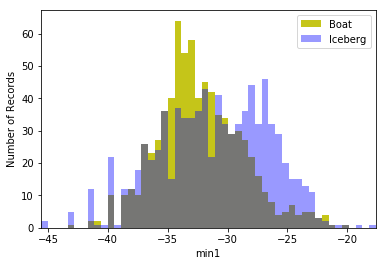

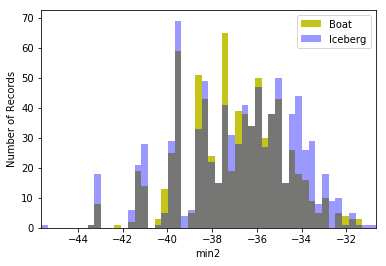

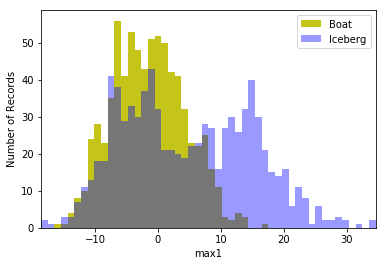

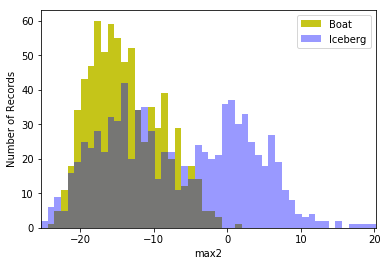

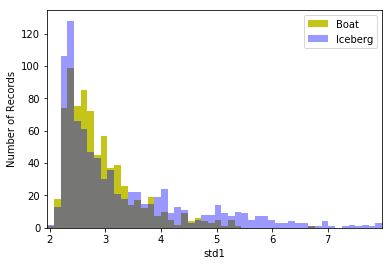

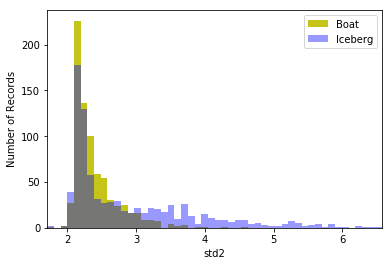

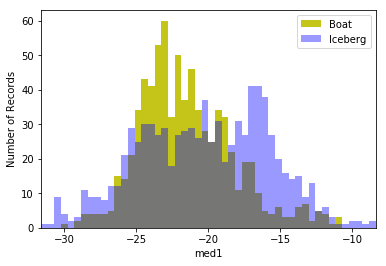

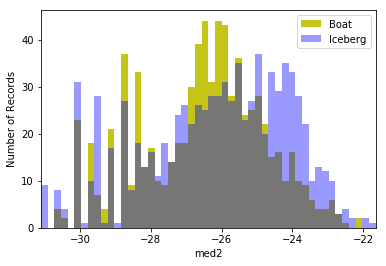

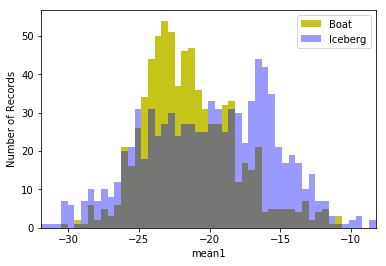

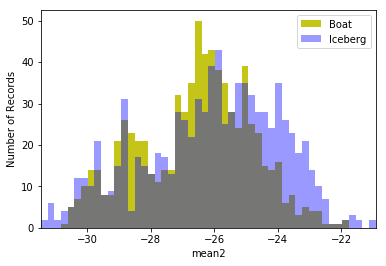

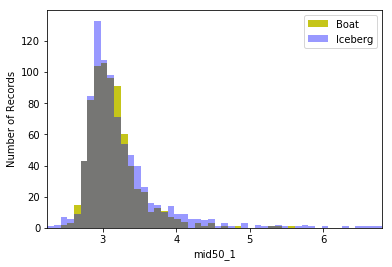

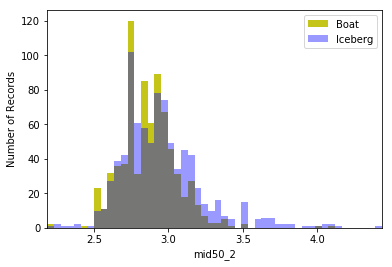

In [164]:
#First band stats - 
for col in ['min1','min2','max1','max2','std1','std2','med1','med2','mean1','mean2','mid50_1','mid50_2']:
    plot_var(col)

In [78]:
train = pd.read_json("./Data/train.json")
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], X_band_2[:, :, :, np.newaxis],((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)

In [79]:
print('Band1')
print(X_band_1[1])
print('Band2')
print(X_band_2[1])
print('Band1Cat2')
print(X_train[1])

Band1
[[-12.24237537 -14.92030525 -14.92036343 ..., -10.63340187 -11.95605373
  -14.37902641]
 [-13.04662609 -14.07784081 -12.72854233 ..., -11.24318886 -11.78629112
  -14.37902641]
 [-15.24811363 -14.07789993 -12.60451412 ..., -15.68016243 -13.51685047
  -14.45488739]
 ..., 
 [-15.58959579 -16.89968491 -17.52791214 ..., -11.78711033 -10.88323402
  -12.3068037 ]
 [-14.76180077 -15.50328636 -15.33302689 ...,  -9.79305172  -8.06226254
   -9.88271523]
 [-13.17817688 -15.50328636 -14.37581444 ..., -11.08755875  -8.24668407
   -8.66680145]]
Band2
[[-31.50632095 -27.98455429 -26.64567757 ..., -25.76563263 -24.46687508
  -25.4899826 ]
 [-25.4857235  -24.95920181 -26.34087753 ..., -28.35830879 -27.98870087
  -25.76575089]
 [-24.70742035 -28.35428238 -26.04647064 ..., -25.48986626 -26.64976311
  -30.48753357]
 ..., 
 [-27.98537254 -26.64649582 -26.04728699 ..., -27.29427719 -29.14941788
  -27.29439545]
 [-29.56905556 -27.63091278 -24.96019363 ..., -24.46769524 -23.9981308
  -25.76662827]
 [-28.

In [80]:
py.init_notebook_mode(connected=True)
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=500,
        height=500,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)

In [83]:
plotmy3d(X_band_1[12,:,:], 'Iceberg')

In [84]:
plotmy3d(X_band_2[12,:,:], 'Iceberg')

In [87]:
plotmy3d(X_band_2[14,:,:], 'Ship')

In [86]:
plotmy3d(X_band_2[14,:,:], 'Ship')

In [165]:
icebergs = train[train.is_iceberg==1].sample(n=4)
ships = train[train.is_iceberg==0].sample(n=4)

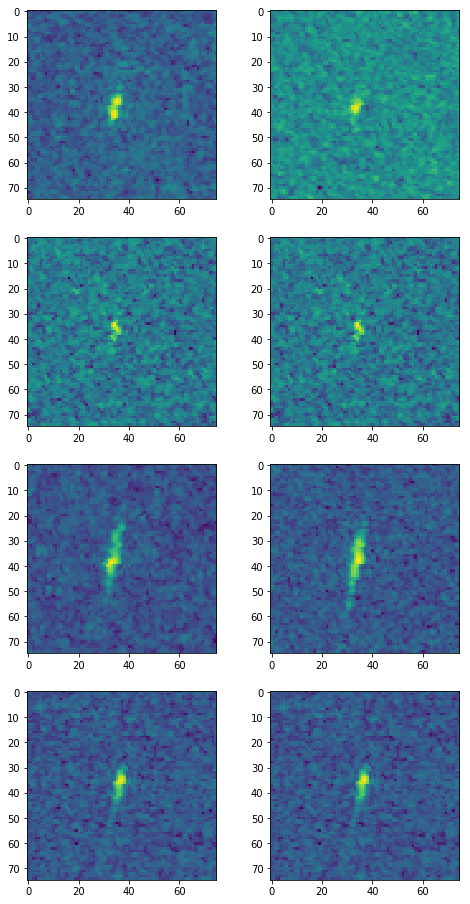

In [232]:

#Ships band 1 vs band 2
fig=plt.figure(1,figsize=(8,16))
ax = fig.add_subplot(4,2,1)
arr = np.reshape(np.array(ships.iloc[0,0]),(75,75))
ax.imshow(arr,cmap='viridis')
ax = fig.add_subplot(4,2,2)
arr = np.reshape(np.array(ships.iloc[0,1]),(75,75))
ax.imshow(arr,cmap='viridis')
ax = fig.add_subplot(4,2,3)
arr = np.reshape(np.array(ships.iloc[1,1]),(75,75))
ax.imshow(arr,cmap='viridis')
ax = fig.add_subplot(4,2,4)
arr = np.reshape(np.array(ships.iloc[1,1]),(75,75))
ax.imshow(arr,cmap='viridis')
ax = fig.add_subplot(4,2,5)
arr = np.reshape(np.array(ships.iloc[2,0]),(75,75))
ax.imshow(arr,cmap='viridis')
ax = fig.add_subplot(4,2,6)
arr = np.reshape(np.array(ships.iloc[2,1]),(75,75))
ax.imshow(arr,cmap='viridis')
ax = fig.add_subplot(4,2,7)
arr = np.reshape(np.array(ships.iloc[3,1]),(75,75))
ax.imshow(arr,cmap='viridis')
ax = fig.add_subplot(4,2,8)
arr = np.reshape(np.array(ships.iloc[3,1]),(75,75))
ax.imshow(arr,cmap='viridis')
    
plt.show()

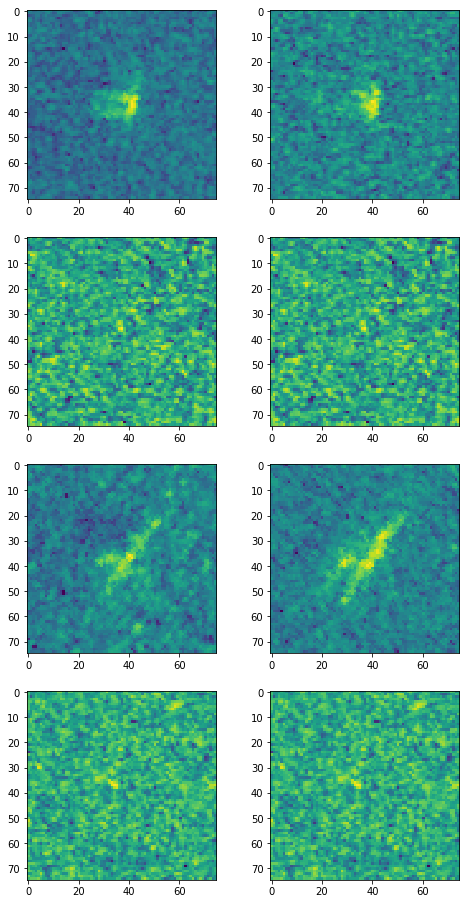

In [233]:
#Icebergs band 1 vs band 2
fig=plt.figure(1,figsize=(8,16))
ax = fig.add_subplot(4,2,1)
arr = np.reshape(np.array(icebergs.iloc[0,0]),(75,75))
ax.imshow(arr,cmap='viridis')
ax = fig.add_subplot(4,2,2)
arr = np.reshape(np.array(icebergs.iloc[0,1]),(75,75))
ax.imshow(arr,cmap='viridis')
ax = fig.add_subplot(4,2,3)
arr = np.reshape(np.array(icebergs.iloc[1,1]),(75,75))
ax.imshow(arr,cmap='viridis')
ax = fig.add_subplot(4,2,4)
arr = np.reshape(np.array(icebergs.iloc[1,1]),(75,75))
ax.imshow(arr,cmap='viridis')
ax = fig.add_subplot(4,2,5)
arr = np.reshape(np.array(icebergs.iloc[2,0]),(75,75))
ax.imshow(arr,cmap='viridis')
ax = fig.add_subplot(4,2,6)
arr = np.reshape(np.array(icebergs.iloc[2,1]),(75,75))
ax.imshow(arr,cmap='viridis')
ax = fig.add_subplot(4,2,7)
arr = np.reshape(np.array(icebergs.iloc[3,1]),(75,75))
ax.imshow(arr,cmap='viridis')
ax = fig.add_subplot(4,2,8)
arr = np.reshape(np.array(icebergs.iloc[3,1]),(75,75))
ax.imshow(arr,cmap='viridis')
    
plt.show()